[1] 1 1

[1] 176   1

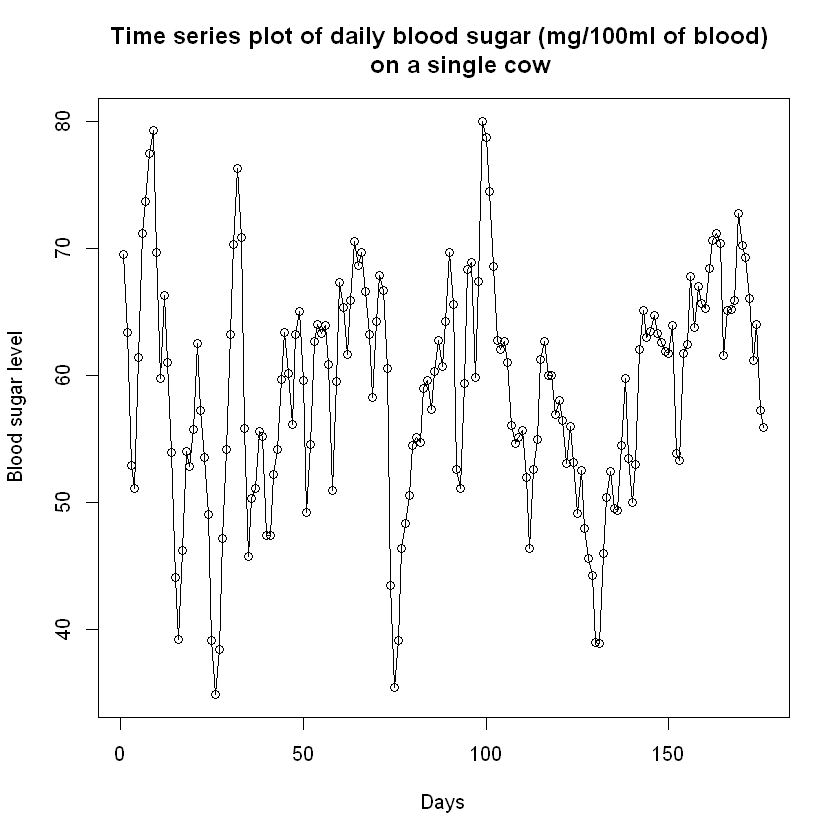

In [19]:
### Time Series Analysis


### 1

# a)
library(forecast)
library(TSA)

bovine.dat <- read.table('bovine.txt')
bovine.ts <- ts(bovine.dat)

# Time series plot
plot(bovine.ts, ylab = 'Blood sugar level', xlab = 'Days', type='o', main='Time series plot of daily blood sugar (mg/100ml of blood) 
     on a single cow')
# No clear trend, nonstationary

# We get the start and end of the time series
start(bovine.ts) # 1
end(bovine.ts) # 176

[1] 1.2

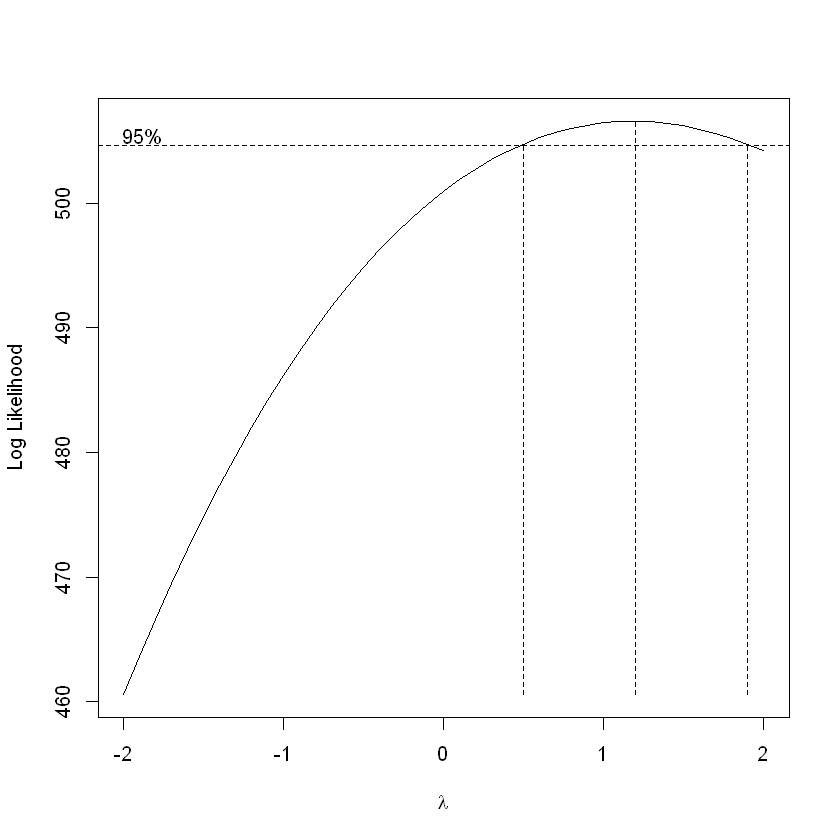

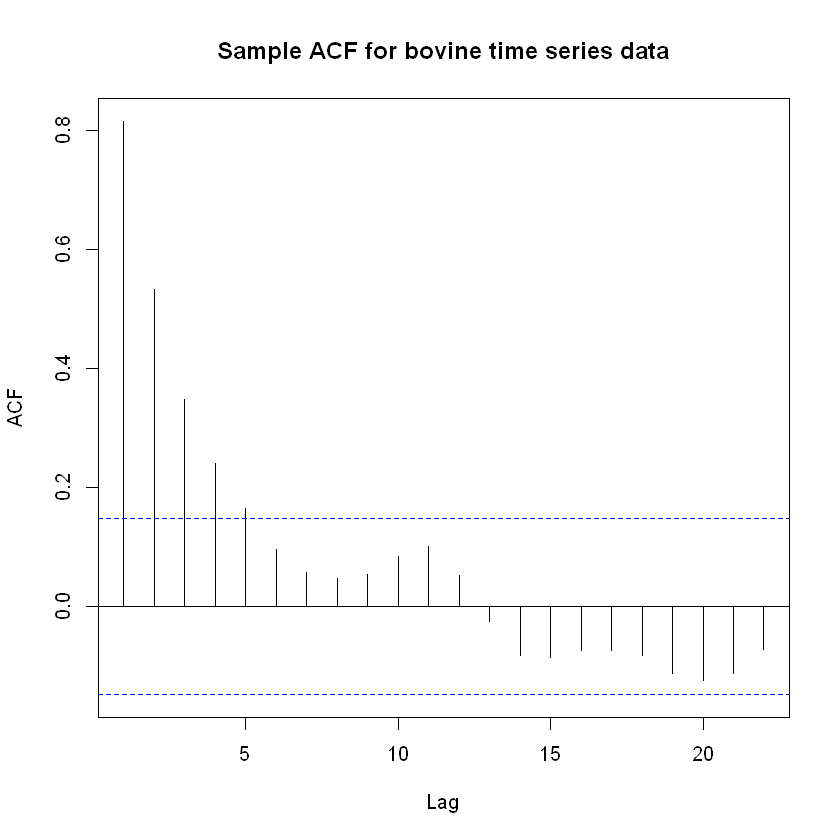

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"3  linear dependencies found"


Reordering variables and trying again:


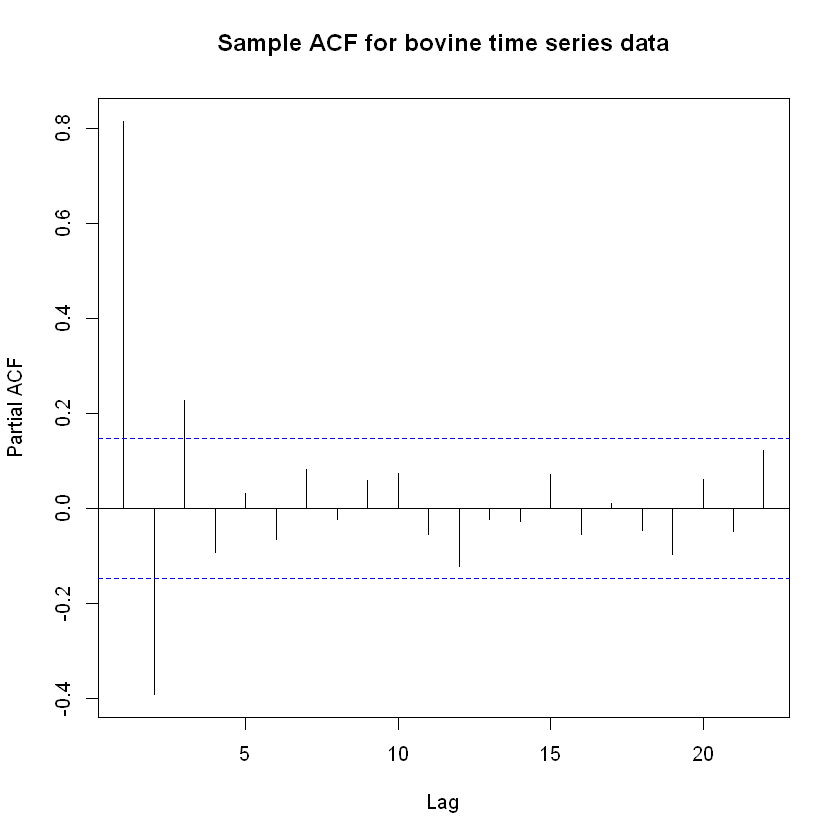

Series: bovine.ts 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1     ma1     mean
      0.6623  0.6107  59.0070
s.e.  0.0622  0.0677   1.6041

sigma^2 = 20.78:  log likelihood = -516.08
AIC=1040.16   AICc=1040.39   BIC=1052.84

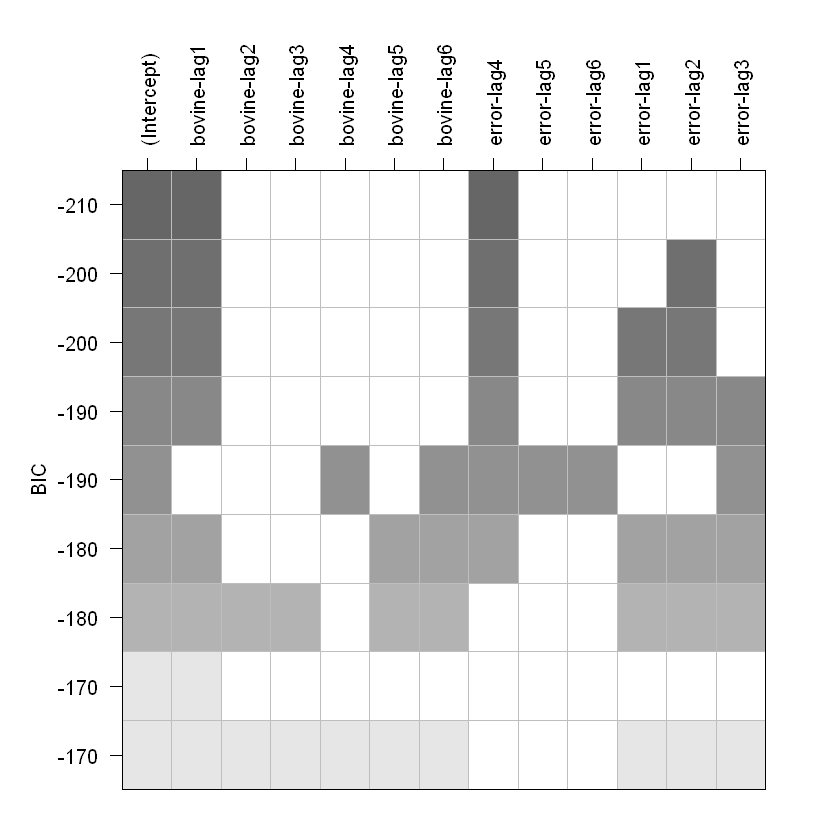

In [20]:
# b)
# Box-Cox transformation due to non-Normal data
bovine.bc <- BoxCox.ar(bovine.ts)
bovine.bc$mle # 1.2 = max. likelihood estimate of power transformation parameter value, lambda
# No need for any transformation since mle of lambda is 1.2

# ACF and PACF plots of the time series to determine the order of a
# stationary model for the data

acf(bovine.ts, main='Sample ACF for bovine time series data') # MA(4), MA(3)???
# 4 signif. spikes suggesting MA(4), cut-off after lag 4
# We can also suggest MA(3), if we consider that the spike at lag 4 is part of the 5% estimates that can come out of the bound

pacf(bovine.ts, main='Sample ACF for bovine time series data') # AR(3)
# 3 signif. spikes, cut-off at lag 3 suggesting AR(3)

# Find the number of subset ARMA models

order.bovine <- armasubsets(y=bovine.ts, nar = 6, nma = 6, y.name = 'bovine', ar.method = 'ols')
plot(order.bovine) # This suggests ARMA(1, 4)

# automatically find the best ARIMA model
auto.arima(bovine.ts, ic='bic') # This suggests ARIMA(1,0,1) with non-zero mean

# Series: bovine.ts 
# ARIMA(1,0,1) with non-zero mean 
# 
# Coefficients:
#         ar1     ma1     mean
#       0.6623  0.6107  59.0070
# s.e.  0.0622  0.0677   1.6041
# 
# sigma^2 estimated as 20.78:  log likelihood=-516.08
# AIC=1040.16   AICc=1040.39   BIC=1052.84

# Good candidate models MA(4), MA(3), AR(3), ARMA(1,4), ARMA(1,1)


In [21]:
# c)

# Compare all candidate models using aic as criteria

arima(bovine.ts, order = c(0,0,4), method = 'ML') # aic = 1044.92
arima(bovine.ts, order = c(0,0,3), method = 'ML') # aic = 1045.37
arima(bovine.ts, order = c(2,0,4), method = 'ML') # aic = 1046.16

arima(bovine.ts, order = c(3,0,0), method = 'ML') # aic = 1043.1
arima(bovine.ts, order = c(1,0,1), method = 'ML') # aic = 1038.16
arima(bovine.ts, order = c(1,0,2), method = 'ML') # aic = 1040.12
arima(bovine.ts, order = c(1,0,4), method = 'ML') # aic = 1043.5

arima(bovine.ts, order = c(2,0,1), method = 'ML') # aic = 1040.11
arima(bovine.ts, order = c(2,0,2), method = 'ML') # aic = 1042.11

# From above results, the best model according to aic criteria is ARiMA(1,0,1)

# Fit the best model
bov.ml <- arima(bovine.ts, order = c(1,0,1), method = 'ML')
bov.ml

# Call:
#   arima(x = bovine.ts, order = c(1, 0, 1), method = "ML")
# 
# Coefficients:
#           ar1     ma1  intercept
#       0.6623  0.6107    59.0071
# s.e.  0.0622  0.0677     1.6040

# sigma^2 estimated as 20.43:  log likelihood = -516.08,  aic = 1038.16


Call:
arima(x = bovine.ts, order = c(0, 0, 4), method = "ML")

Coefficients:
         ma1     ma2     ma3     ma4  intercept
      1.2841  0.8326  0.4298  0.1064    58.9517
s.e.  0.0747  0.1111  0.1044  0.0741     1.2455

sigma^2 estimated as 20.75:  log likelihood = -517.46,  aic = 1044.92


Call:
arima(x = bovine.ts, order = c(0, 0, 3), method = "ML")

Coefficients:
         ma1     ma2     ma3  intercept
      1.2664  0.7840  0.3097    58.9284
s.e.  0.0706  0.0962  0.0652     1.1546

sigma^2 estimated as 21.04:  log likelihood = -518.68,  aic = 1045.37

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"
Warning message in sqrt(diag(x$var.coef)):
"NaNs produced"



Call:
arima(x = bovine.ts, order = c(2, 0, 4), method = "ML")

Coefficients:
         ar1      ar2     ma1      ma2      ma3     ma4  intercept
      0.9894  -0.2253  0.2897  -0.1868  -0.0050  0.0039    59.0019
s.e.     NaN      NaN     NaN      NaN   0.1983  0.0837     1.5720

sigma^2 estimated as 20.43:  log likelihood = -516.08,  aic = 1046.16


Call:
arima(x = bovine.ts, order = c(3, 0, 0), method = "ML")

Coefficients:
         ar1      ar2    ar3  intercept
      1.2436  -0.6679  0.225    58.9912
s.e.  0.0733   0.1084  0.074     1.6963

sigma^2 estimated as 20.78:  log likelihood = -517.55,  aic = 1043.1


Call:
arima(x = bovine.ts, order = c(1, 0, 1), method = "ML")

Coefficients:
         ar1     ma1  intercept
      0.6623  0.6107    59.0071
s.e.  0.0622  0.0677     1.6040

sigma^2 estimated as 20.43:  log likelihood = -516.08,  aic = 1038.16


Call:
arima(x = bovine.ts, order = c(1, 0, 2), method = "ML")

Coefficients:
         ar1     ma1     ma2  intercept
      0.6478  0.6308  0.0245    59.0013
s.e.  0.0938  0.1171  0.1150     1.5815

sigma^2 estimated as 20.42:  log likelihood = -516.06,  aic = 1040.12


Call:
arima(x = bovine.ts, order = c(1, 0, 4), method = "ML")

Coefficients:
         ar1     ma1      ma2      ma3      ma4  intercept
      0.7414  0.5406  -0.0835  -0.1033  -0.0900    59.0040
s.e.  0.2062  0.2223   0.2832   0.2130   0.1242     1.6387

sigma^2 estimated as 20.35:  log likelihood = -515.75,  aic = 1043.5


Call:
arima(x = bovine.ts, order = c(2, 0, 1), method = "ML")

Coefficients:
         ar1      ar2     ma1  intercept
      0.6909  -0.0296  0.5885    59.0008
s.e.  0.1422   0.1321  0.1234     1.5777

sigma^2 estimated as 20.42:  log likelihood = -516.06,  aic = 1040.11


Call:
arima(x = bovine.ts, order = c(2, 0, 2), method = "ML")

Coefficients:
         ar1      ar2     ma1      ma2  intercept
      0.7316  -0.0570  0.5478  -0.0244    58.9969
s.e.  1.6600   1.1132  1.6529   0.9956     1.5753

sigma^2 estimated as 20.42:  log likelihood = -516.05,  aic = 1042.11


Call:
arima(x = bovine.ts, order = c(1, 0, 1), method = "ML")

Coefficients:
         ar1     ma1  intercept
      0.6623  0.6107    59.0071
s.e.  0.0622  0.0677     1.6040

sigma^2 estimated as 20.43:  log likelihood = -516.08,  aic = 1038.16

In [22]:
# d)

# Mathematical (equation) expression of the fitted model

# X_t - 59.0071 = 0.6623(X_{t-1} - 59.0071) + 0.6107*Z_{t-1} + Z_t

# e)
# white noise variance estimate using the CLS (conditional least squares)
# estimation
bov.cls <- arima(bovine.ts, order = c(1,0,1), method = 'CSS') # 20.38

In [23]:
bov.cls


Call:
arima(x = bovine.ts, order = c(1, 0, 1), method = "CSS")

Coefficients:
         ar1     ma1  intercept
      0.6625  0.6111    58.7013
s.e.  0.0616  0.0670     1.6192

sigma^2 estimated as 20.38:  part log likelihood = -515.01


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with non-zero mean
Q* = 1.6841, df = 8, p-value = 0.9892

Model df: 2.   Total lags used: 10



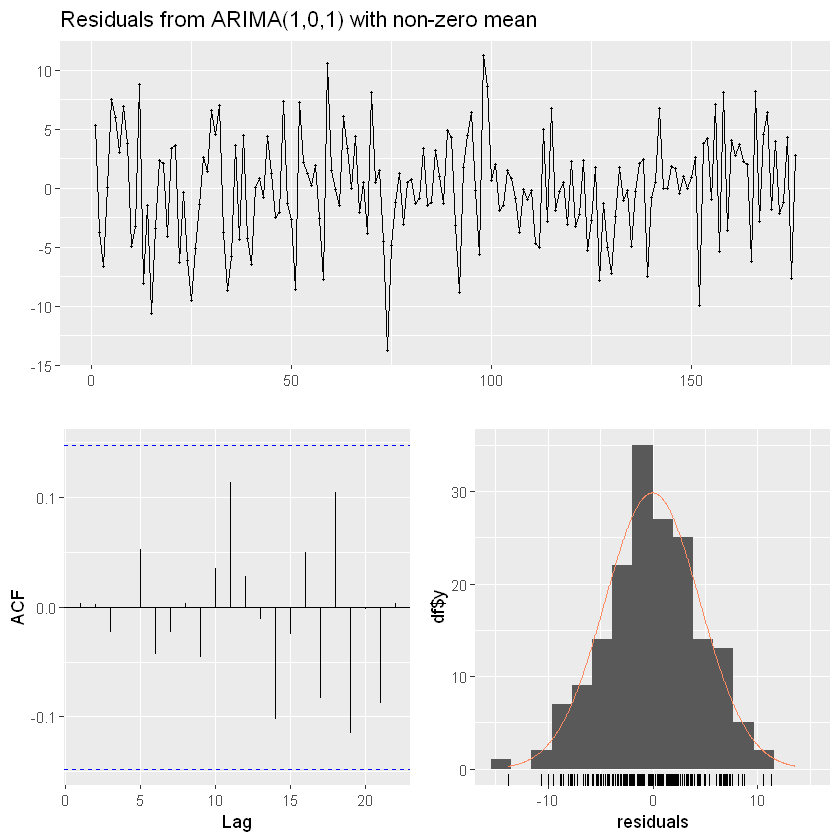

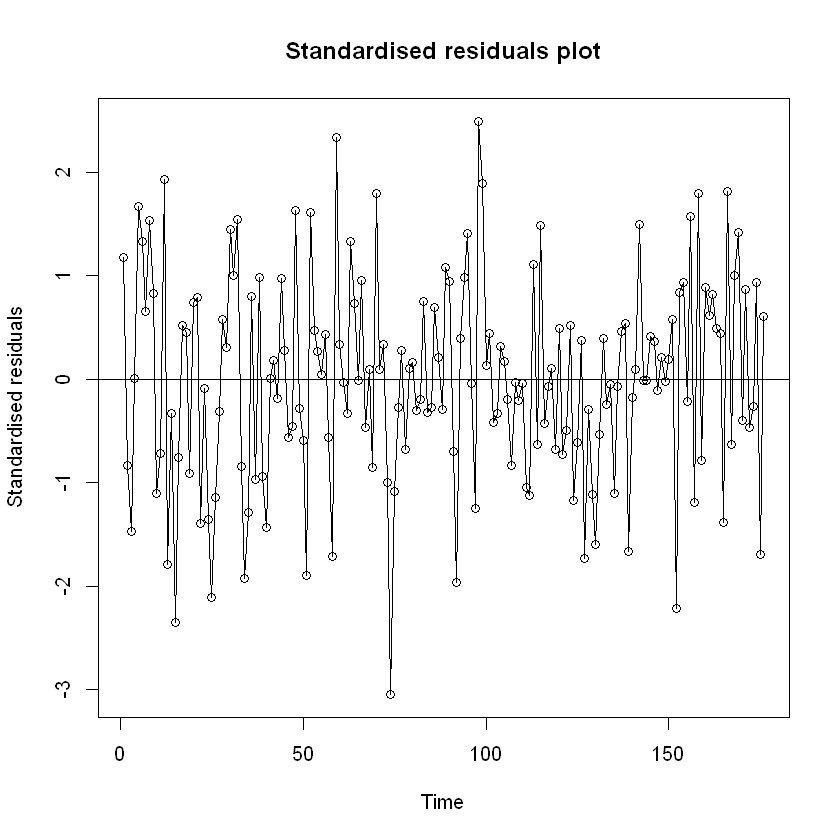

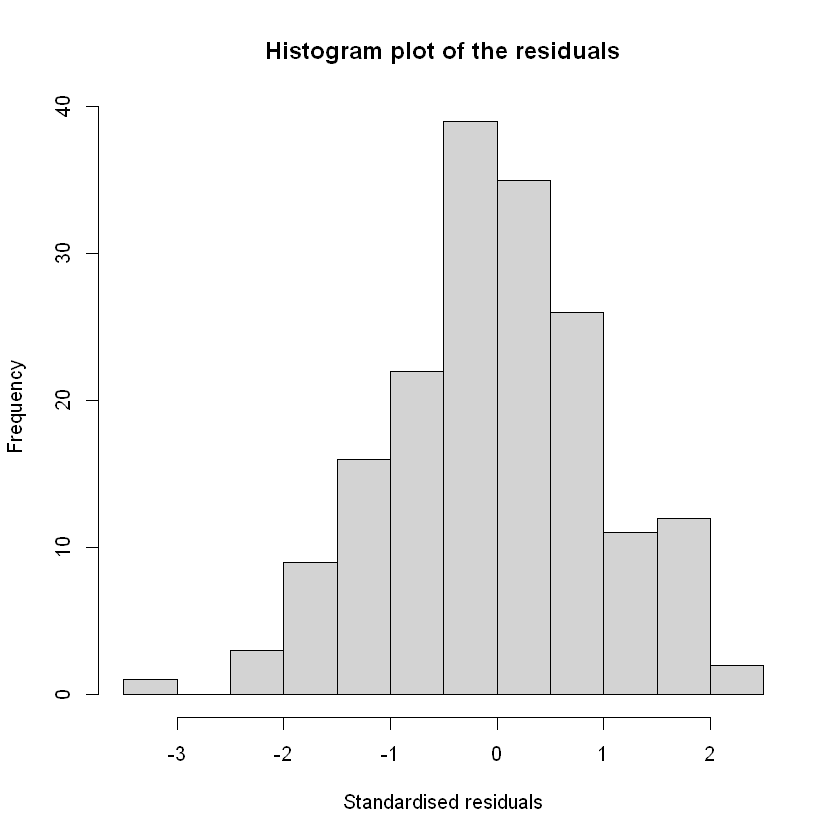

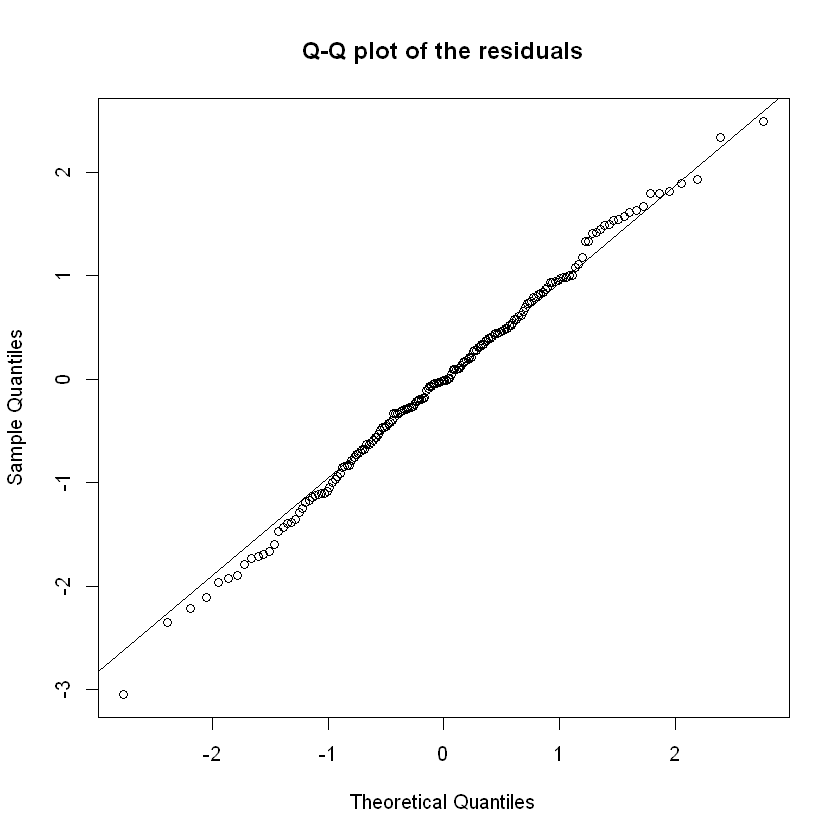


	Box-Ljung test

data:  residuals(bov.ml)
X-squared = 1.6841, df = 8, p-value = 0.9892


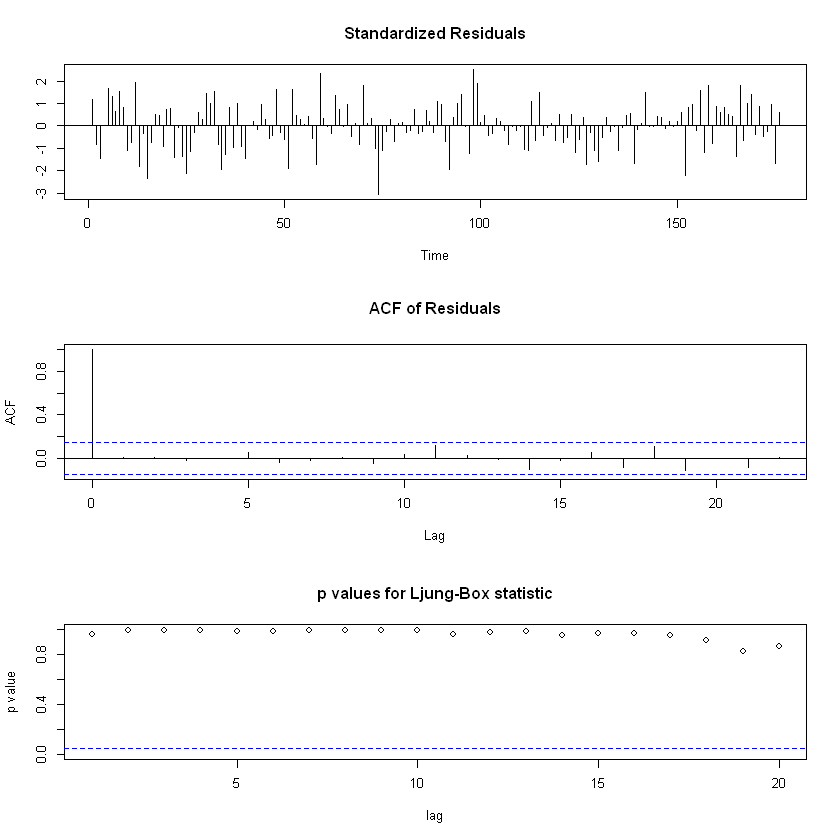

In [24]:
checkresiduals(bov.ml) # Quick check of the residuals

# Sample ACF and histogram of the residuals look quite okay 
# The residuals plot looks quite stationary

# Standardised residuals plot to check the residuals
plot(rstandard(bov.ml), xlab="Time", ylab="Standardised residuals", type='o', main = 'Standardised residuals plot')
abline(h=0)
# The plot looks stationary with mean zero

# Normality check for the residuals
hist(rstandard(bov.ml),xlab="Standardised residuals",main="Histogram plot of the residuals")
#Looks fairly okay, but a little bit skewed

qqnorm(rstandard(bov.ml),main="Q-Q plot of the residuals")
qqline(rstandard(bov.ml))
# Looks fairly good with a good fit with normality assumption

# Diagnostic Plots for Time-Series Fits
tsdiag(bov.ml, gof=20, omit.initial=F)
# The standardized residuals, ACF of residuals p-values for Ljung-Box statistic all look good
# The residual output fully supports ARMA(1,1) model 

Box.test(residuals(bov.ml),lag =10, type="Ljung-Box",fitdf=2)  # Box-Ljung test  with fitdf=p+q
# p-value for the Ljung-Box do not reject the null hypothesis. It confirms that the residuals behave like a white noise

#     Box-Ljung test
# 
# data:  residuals(bov.ml)
# X-squared = 1.6841, df = 8, p-value = 0.9892

A Time Series:
 [1] 58.643 58.766 58.847 58.901 58.937 58.961 58.976 58.987 58.994 58.998

A Time Series:
 [1] 4.520 7.316 8.249 8.627 8.787 8.856 8.887 8.900 8.906 8.908

Day,lower.bov,upper.bov
<int>,<ts>,<ts>
177,49.78461,67.50142
178,44.42608,73.10584
179,42.67924,75.01554
180,41.99349,75.80915
181,41.71478,76.15929
182,41.60232,76.31907
183,41.55861,76.39411
184,41.54301,76.43046
185,41.53850,76.44872


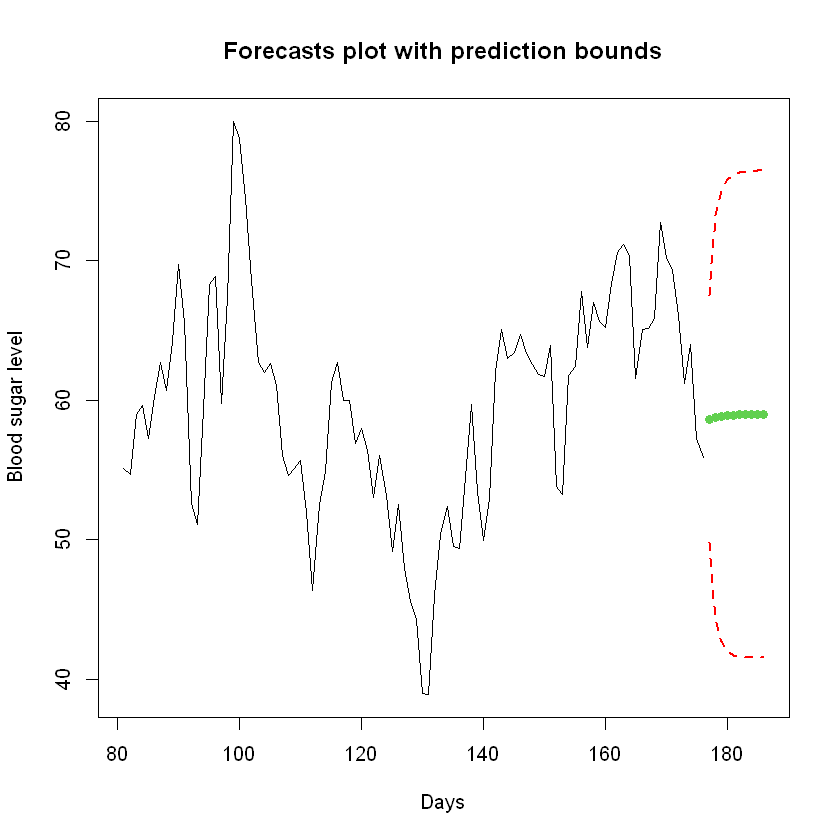

In [25]:
# g)

# MMSE forecasts for the lead time h = 1, 2, ..., 10
bov.ml.predict <- predict(bov.ml, n.ahead = 10)

round(bov.ml.predict$pred, 3) # predicted values
# Time Series:
# Start = 177 
# End = 186 
# Frequency = 1 
# [1] 58.643 58.766 58.847 58.901 58.937 58.961 58.976 58.987 58.994 58.998

round(bov.ml.predict$se, 3) # standard error of predicted values

# Lower and upper bounds prediction interval

lower.bov <- bov.ml.predict$pred - qnorm(0.975, 0, 1) * bov.ml.predict$se
upper.bov <- bov.ml.predict$pred + qnorm(0.975, 0, 1) * bov.ml.predict$se

# Create a data frame for the predicted intervals for days 177-186
data.frame(Day=c(177:186), lower.bov, upper.bov)
#     Day lower.bov upper.bov
# 1  177  49.78461  67.50142
# 2  178  44.42608  73.10584
# 3  179  42.67924  75.01554
# 4  180  41.99349  75.80915
# 5  181  41.71478  76.15929
# 6  182  41.60232  76.31907
# 7  183  41.55861  76.39411
# 8  184  41.54301  76.43046
# 9  185  41.53850  76.44872
# 10 186  41.53806  76.45826

# Plot of the forecasts with prediction bounds
plot( window(bovine.ts, start=81, end=end(bovine.ts)), xlim=c(81,186), ylab='Blood sugar level',xlab="Days", 
      main='Forecasts plot with prediction bounds')
lines(bov.ml.predict$pred, x=177:186, type='b', pch=16, col=3 ) 

# Put prediction interval lines on plot (darker than default)
lines(y=lower.bov, x=177:186, lwd=2, col="red", lty="dashed")
lines(y=upper.bov, x=177:186, lwd=2, col="red", lty="dashed")